<a href="https://colab.research.google.com/github/Mohammed-Fayaz-Ahamed/DataScience_assignment/blob/main/SVM_forestfires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'
day	day of the week: 'mon' to 'sun'
FFMC	FFMC index from the FWI system: 18.7 to 96.20
DMC	DMC index from the FWI system: 1.1 to 291.3
DC	DC index from the FWI system: 7.9 to 860.6
ISI	ISI index from the FWI system: 0.0 to 56.10
temp	temperature in Celsius degrees: 2.2 to 33.30
RH	relative humidity in %: 15.0 to 100
wind	wind speed in km/h: 0.40 to 9.40
rain	outside rain in mm/m2 : 0.0 to 6.4
Size_Categorie 	the burned area of the forest ( Small , Large)

In [2]:
##Import the file
import pandas as pd
ds = pd.read_csv('/content/forestfires.csv')
ds

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [2]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [3]:
# Data transformation

mappings = {}
for i in dict(ds.dtypes):
 if dict(ds.dtypes)[i] == 'O':
  mappings[i] = dict(zip(ds[i].unique(), range(len(ds[i].unique()))))
  ds[i] = ds[i].map(lambda x: mappings[i][x])


In [4]:
ds

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,1,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,0,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,2,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,2,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,2,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


<ipython-input-6-564284fd121a>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ds.corr()


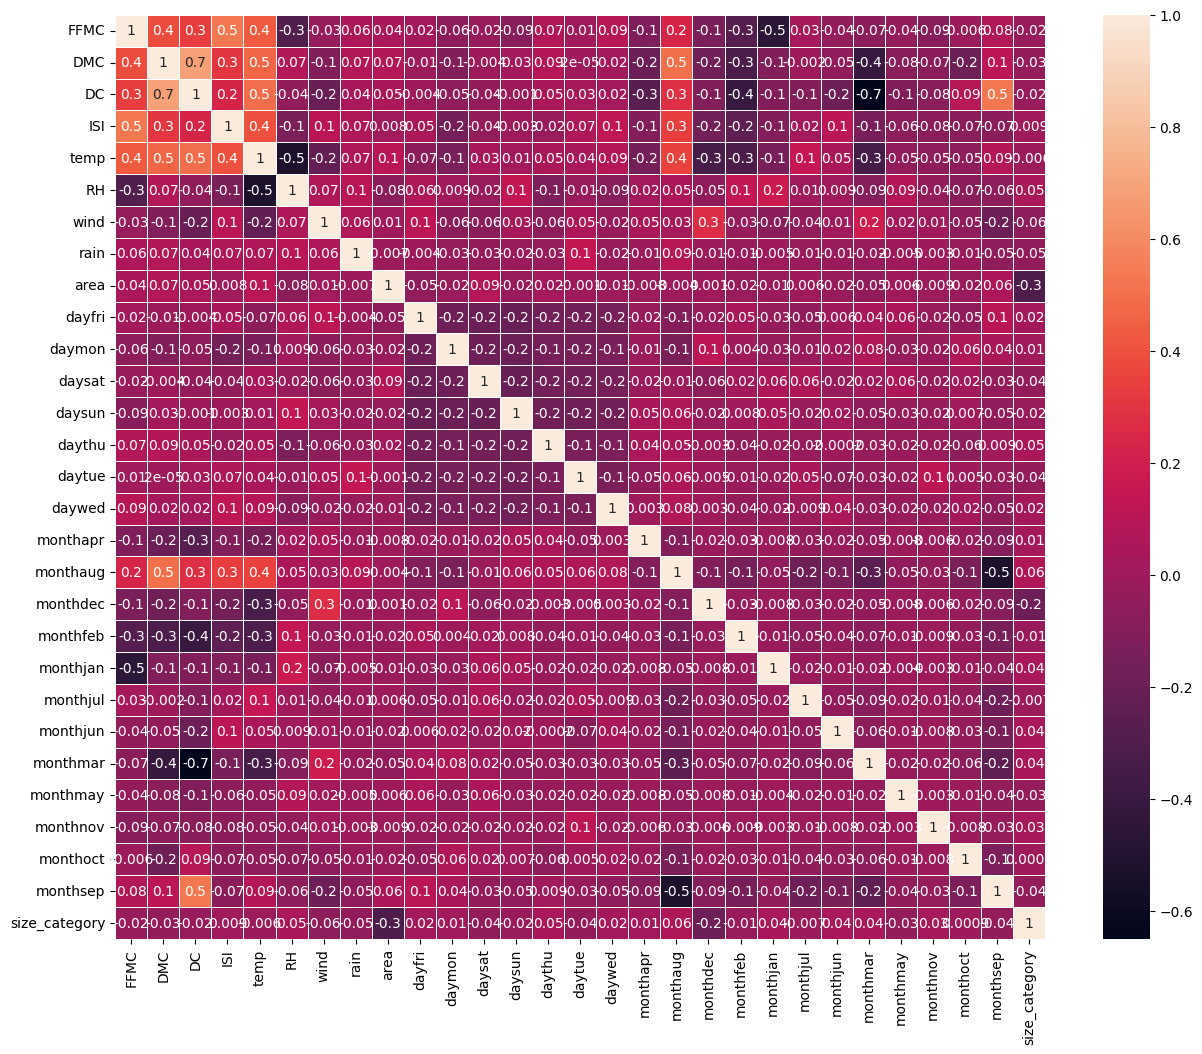

In [6]:
#EDA
# Exploratory data analysis
# Exploratory data analysis
import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize = (15, 12))
corr = ds.corr()

sns.heatmap(data = corr, annot = True, fmt = '.1g', linewidth = 0.5)
plt.show()

In [5]:
# Format the plot background and scatter plots for all the variables

import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(ds)

In [ ]:
ds.shape

(517, 31)

In [17]:
# Split X and Y Variables
Y = ds['size_category']    #If you Required graph please change the "2:28" to 0r any two X variable columns and run
X = ds.drop('size_category', axis =1)
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,1,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,0,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,2,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,2,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,2,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((387, 30), (387,), (130, 30), (130,))

In [19]:
# Model Fitting

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
svc = SVC()
svc= svc.fit(X_train, Y_train)
pred = svc.predict(X_test)
print ('Accuracy:', accuracy_score(Y_test, pred))
print ('\n clasification report:\n', classification_report(Y_test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_test, pred))

Accuracy: 0.7307692307692307

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.10      0.19        39
           1       0.72      1.00      0.84        91

    accuracy                           0.73       130
   macro avg       0.86      0.55      0.51       130
weighted avg       0.81      0.73      0.64       130


 confussion matrix:
 [[ 4 35]
 [ 0 91]]


In [21]:
# Tuning

from sklearn.model_selection import GridSearchCV
params = [{'kernel':['rbf','poly'],'gamma': [0.01,0.02,0.03],'C':[100,150,200]}]
svc = SVC()
optimize_model = GridSearchCV(estimator=svc, param_grid=params, refit = True, verbose=1)
optimize_model.fit(X, Y)
print("Best parameters: ", optimize_model.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'poly'}


In [23]:
# With the best parameters

svc = SVC(C=100, kernel='poly', gamma=0.01)
svc= svc.fit(X_train, Y_train)
pred = svc.predict(X_test)
print ('Accuracy:', accuracy_score(Y_test, pred))
print ('\n clasification report:\n', classification_report(Y_test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_test, pred))

Accuracy: 0.9769230769230769

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        39
           1       0.99      0.98      0.98        91

    accuracy                           0.98       130
   macro avg       0.97      0.98      0.97       130
weighted avg       0.98      0.98      0.98       130


 confussion matrix:
 [[38  1]
 [ 2 89]]
